In [1]:
# numpy - a library for numerical computations
!pip install numpy

# pandas - a library for data manipulation and analysis
!pip install pandas

# scikit-learn - a library for machine learning
!pip install scikit-learn

# matplotlib - a library for creating static, interactive, and animated visualizations
!pip install matplotlib

# seaborn - a library for making statistical graphics in Python based on matplotlib
!pip install seaborn

In [17]:
# Import the necessary libraries for data processing and machine learning.
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
from sklearn import datasets
import matplotlib.pyplot as plt#

In [18]:
#load data
shelter_data = pd.read_excel('INF2178_A1_data.xlsx')

In [24]:
#check the data
shelter_data.head(10)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
5,2021-01-01,COSTI Immigrant Services,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,8.0,6.0,NaN,NaN
6,2021-01-01,COSTI Immigrant Services,15372,COSTI Uptown Hotel COVID-19 - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,120,Room Based Capacity,NaN,NaN,46.0,44.0
7,2021-01-01,COSTI Immigrant Services,13751,COSTI Uptown Hotel Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,130,Room Based Capacity,NaN,NaN,46.0,44.0
8,2021-01-01,Christie Ossington Neighbourhood Centre,16111,CONC Etobicoke Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,153,Room Based Capacity,NaN,NaN,145.0,145.0
9,2021-01-01,Christie Ossington Neighbourhood Centre,15711,CONC Men's Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,40,Room Based Capacity,NaN,NaN,41.0,40.0


In [25]:
summary_stats = shelter_data.describe()
print(summary_stats)

                      OCCUPANCY_DATE    PROGRAM_ID  SERVICE_USER_COUNT  \
count                          50944  50944.000000        50944.000000   
mean   2021-06-29 13:31:57.022612992  13986.125844           45.727171   
min              2021-01-01 00:00:00  11791.000000            1.000000   
25%              2021-03-30 00:00:00  12233.000000           15.000000   
50%              2021-06-28 00:00:00  14251.000000           28.000000   
75%              2021-09-29 00:00:00  15651.000000           51.000000   
max              2021-12-31 00:00:00  16631.000000          339.000000   
std                              NaN   1705.288632           53.326049   

       CAPACITY_ACTUAL_BED  OCCUPIED_BEDS  CAPACITY_ACTUAL_ROOM  \
count         32399.000000   32399.000000          18545.000000   
mean             31.627149      29.780271             55.549259   
min               1.000000       1.000000              1.000000   
25%              15.000000      14.000000             19.000000  

In [13]:
# Calculate occupancy rates
shelter_data['OCCUPANCY_RATE'] = shelter_data['OCCUPIED_ROOMS'] / shelter_data['CAPACITY_ACTUAL_ROOM']

# Drop rows with NaN values in 'OCCUPANCY_RATE'
data_cleaned = shelter_data.dropna(subset=['OCCUPANCY_RATE'])

# Now I can proceed with the one-sample t-test
from scipy.stats import ttest_1samp

# Selecting the 'Families' sector for the test
families_occupancy_rates = data_cleaned[data_cleaned['SECTOR'] == 'Families']['OCCUPANCY_RATE']

# Hypothesized mean(ASSUMED)
hypothesized_mean = 0.8

# Performing the one-sample t-test
t_stat_1sample, p_value_1sample = ttest_1samp(families_occupancy_rates, hypothesized_mean)


In [14]:
#show result
print("t-statistic = " + str(t_stat_1sample))
print("p-value = " + str(p_value_1sample))

t-statistic = 73.91863704056344
p-value = 0.0


In [15]:
from scipy.stats import ttest_ind

# Selecting the groups
group_families = data_cleaned[data_cleaned['SECTOR'] == 'Families']['OCCUPANCY_RATE']
group_mixed_adult = data_cleaned[data_cleaned['SECTOR'] == 'Mixed Adult']['OCCUPANCY_RATE']

# Performing the two-sample t-test
t_stat_2sample, p_value_2sample = ttest_ind(group_families, group_mixed_adult)


In [16]:
#show result
print("t-statistic = " + str(t_stat_2sample))
print("p-value = " + str(p_value_2sample))

t-statistic = 8.660754065466053
p-value = 5.290740247388472e-18


In [36]:
# Performing Welch's t-test
t_stat_welch, p_value_welch = ttest_ind(group_families, group_mixed_adult, equal_var=False)

In [37]:
#show result
print("t-statistic = " + str(t_stat_welch))
print("p-value = " + str(p_value_welch))

t-statistic = 9.17540822190609
p-value = 5.3308370032743536e-20


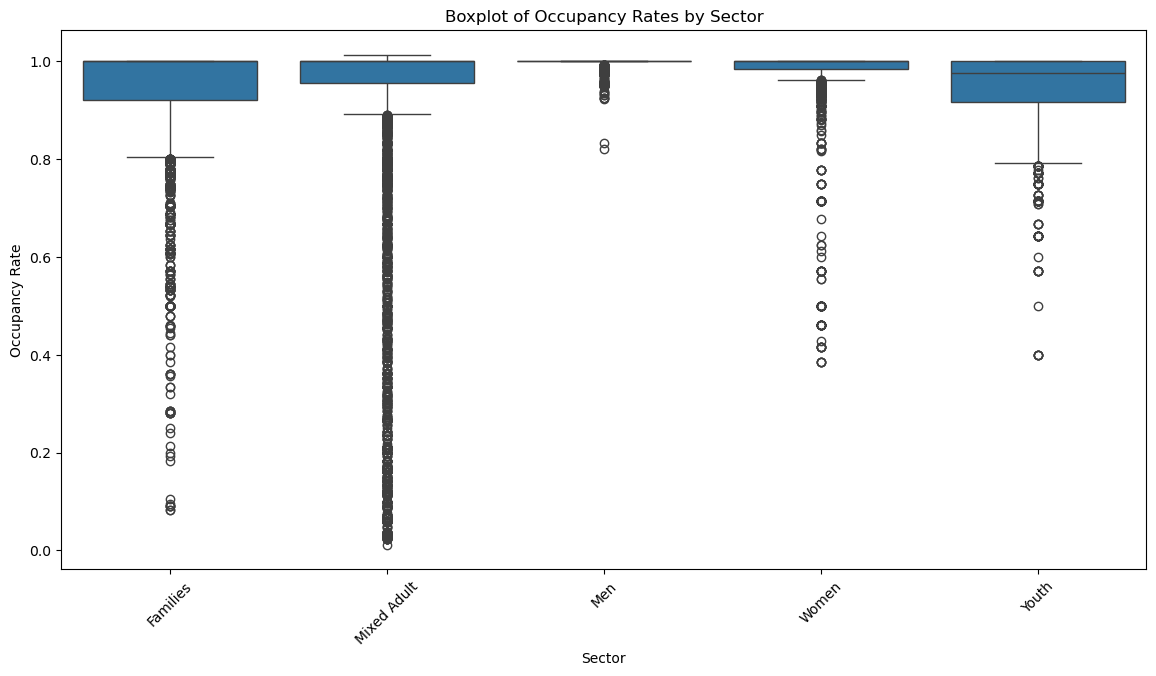

In [38]:
# Boxplot for Occupancy Rates by Sector
plt.figure(figsize=(14, 7))
sns.boxplot(x='SECTOR', y='OCCUPANCY_RATE', data=data_cleaned)
plt.title('Boxplot of Occupancy Rates by Sector')
plt.xlabel('Sector')
plt.ylabel('Occupancy Rate')
plt.xticks(rotation=45)  # Rotating the x labels for better readability
plt.show()


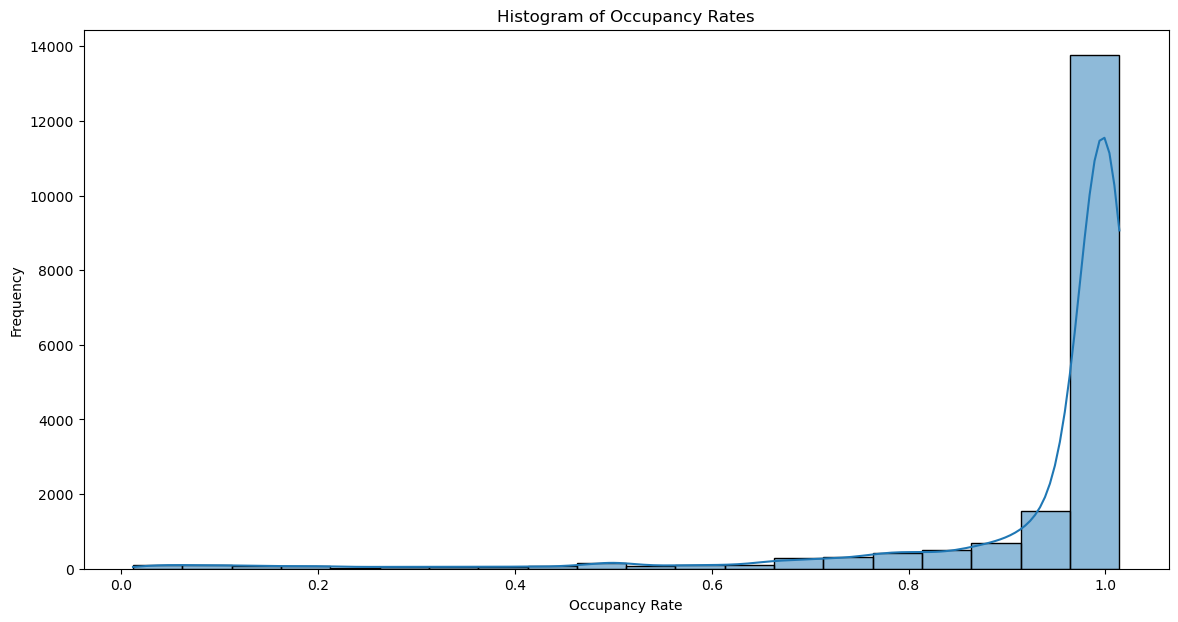

In [39]:
# Histogram for Occupancy Rates
plt.figure(figsize=(14, 7))
sns.histplot(data_cleaned['OCCUPANCY_RATE'], kde=True, bins=20)
plt.title('Histogram of Occupancy Rates')
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')
plt.show()


In [27]:
# Lazy to type more(sorry)
data = shelter_data

In [28]:
# Calculate capacity rates for rooms and beds 
data['ROOM_CAPACITY_RATE'] = data['OCCUPIED_ROOMS'] / data['CAPACITY_ACTUAL_ROOM']
data['BED_CAPACITY_RATE'] = data['OCCUPIED_BEDS'] / data['CAPACITY_ACTUAL_BED']

# Filter data for room based and bed based capacity
room_based_data = data[data['CAPACITY_TYPE'] == 'Room Based Capacity']['ROOM_CAPACITY_RATE'].dropna()
bed_based_data = data[data['CAPACITY_TYPE'] == 'Bed Based Capacity']['BED_CAPACITY_RATE'].dropna()

# Conduct the two-sample t-test
t_stat, p_value = ttest_ind(room_based_data, bed_based_data, equal_var=False)  # Welch's t-test, not assuming equal variance

In [29]:
#show result
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_value))

t-statistic = 4.498751771925636
p-value = 6.860477551487939e-06
